# Project 1

### 0. Import Libraries

In [118]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
%matplotlib inline

### 1. Read Data

In [119]:
animal = pd.read_csv('zoo.csv')

ani_class = pd.read_csv('class.csv')

### 2. Data Processing


In [120]:
df = pd.merge(animal,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [121]:
# finding Unique value of class_type
type_list = [i for i in df.class_type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

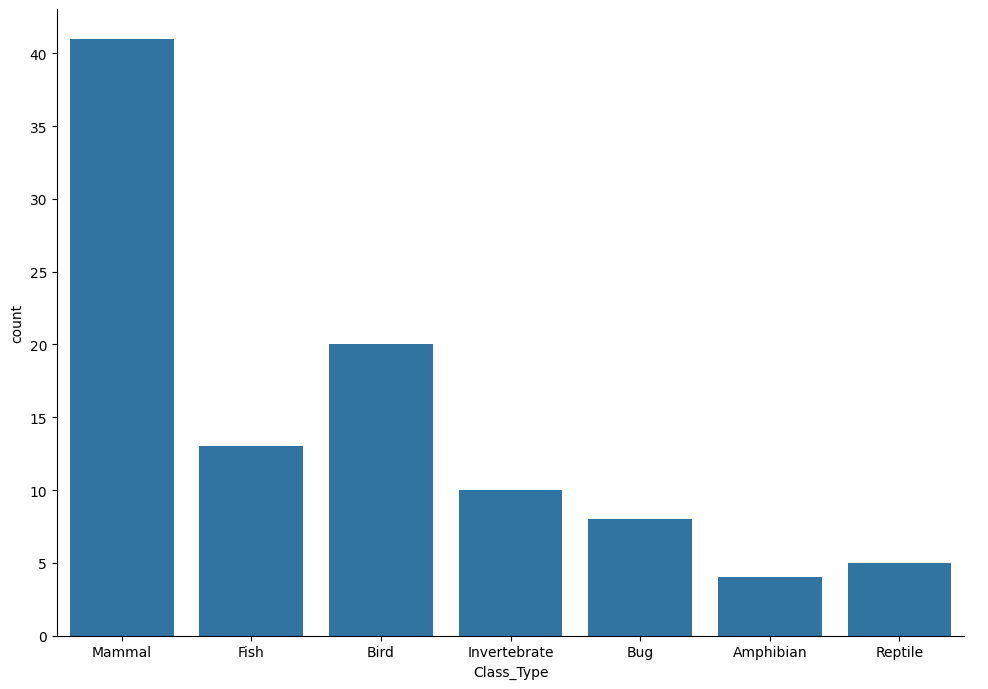

In [122]:
# use seaborn to plot the count of each 7 class_type
sns.catplot(x='Class_Type',y='Number_Of_Animal_Species_In_Class',data=df,height=7,aspect=1.4,kind='bar')
plt.ylabel('count')
plt.show()

این مجموعه داده ،یک داده نامتعادل است چرا که تعداد نمونه های درون هر کلاس اختلاف زیادی دارند.متعادل بودن داده در عمکلکرد مدل تاثیری زیادی دارد چرا که مدل روی پیشبینی داده هایی که تعداد بیشتری داشته اند بهتر عمل میکند ولی روی چیشبینی داده هایی ک کمتر آنها را دیده است ممکن است خوب عمل نکند.
برای ایجاد یک داده متعادل میتوان نمونه های مصنوعی ایجاد کرد و به کلاس اقلیت اضافه کرد.
همچنین میتوان تعداد نمونه های کلاس اکثریت را افزایش داد


### 3. Train_Test_Split

In [123]:
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]

# length of dataset
len(X)

101

In [124]:
# use train_test_split to split the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)


### 4. Multilayer Perceptron Training

In [125]:
# use MLPClassifier and train a multilayer perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp=MLPClassifier(hidden_layer_sizes=(6,),random_state=0,max_iter=10000,solver='adam',alpha=0.1)
mlp.fit(X_train,Y_train)

y_hat=mlp.predict(X_test)
y_train_pred=mlp.predict(X_train)

print('test accuracy = ',accuracy_score(Y_test,y_hat))
print('train accuracy = ',accuracy_score(Y_train,y_train_pred))

test accuracy =  1.0
train accuracy =  1.0


### 5. Discuss

In [126]:
# For different values of test sets, train different models and discuss the results. 

for random_state in range(10):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=random_state)
    mlp=MLPClassifier(hidden_layer_sizes=(6,6),random_state=42,max_iter=100000,solver='adam',alpha=0.1)
    mlp.fit(X_train,Y_train)

    y_hat=mlp.predict(X_test)
    y_train_pred=mlp.predict(X_train)

    print('test accuracy = ',accuracy_score(Y_test,y_hat))
    print('train accuracy = ',accuracy_score(Y_train,y_train_pred))
    print('\n\n')

    

test accuracy =  1.0
train accuracy =  1.0



test accuracy =  0.9523809523809523
train accuracy =  1.0



test accuracy =  0.9047619047619048
train accuracy =  1.0



test accuracy =  0.9523809523809523
train accuracy =  1.0



test accuracy =  0.9047619047619048
train accuracy =  1.0



test accuracy =  0.9523809523809523
train accuracy =  1.0



test accuracy =  1.0
train accuracy =  1.0



test accuracy =  0.9523809523809523
train accuracy =  1.0



test accuracy =  0.8571428571428571
train accuracy =  1.0



test accuracy =  1.0
train accuracy =  1.0





با تغیر داده های آموزش و آزمون دقت مدل روی داده آزمون تغیر میکند ولی دقت روی داده آموزش همیشه برابر با 1 است چرا که بدلیل اینکه داده های مسئله پیچیدگی زیادی ندارند میتوان مدلی ساخت که دقت 1 داشته باشد ولی در بعضی از تقسیم بندی ها اورفیت داریم که میتوان برای انها کمی از پیچیدگی مدل کم کرد تا اثر اورفیت کم شود.همچنین میتوان فهمید بدلیل اینکه همیشه دقت داده آموزش 1 است،مدل داده های آموزش را حفط میشود